In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
import math
import datetime
from datetime import date
import viz

### Simulation Based Approach

* Population: 1000 lottery tickets produced by Codeup
* Parameter we interested: win rate. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

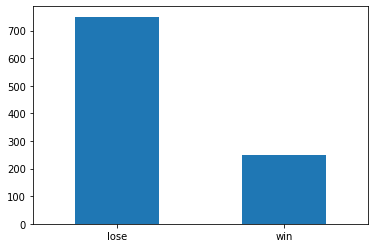

In [2]:
# Create the lottery ticket population: 250 wins and 750 loses

tickets = pd.Series([True]*250 + [False]*750)
tickets

# Visualize the distribution

tickets.value_counts().set_axis(['lose', 'win']).plot.bar()
plt.xticks(rotation=0)

In [5]:
# Take a random sample of 25 tickets

n=25
tickets.sample(n).mean()

0.32

In [6]:
# Use the list comprehension to generate the 5 random samples

[tickets.sample(n).mean() for _ in range(5)]

[0.16, 0.24, 0.24, 0.32, 0.36]

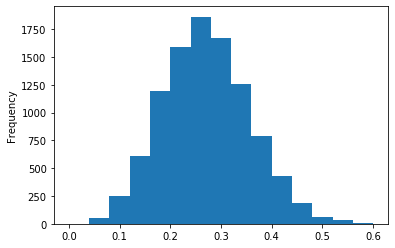

In [7]:
# Test Central Limit 

calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [8]:
se = math.sqrt((0.25*0.75)/n)
se

0.08660254037844387

In [9]:
calculated_winrates.agg(['mean','std'])

mean    0.251084
std     0.085988
dtype: float64

In [10]:
# Calculate the p-value

mean = calculated_winrates.agg(['mean','std'])['mean']
std = calculated_winrates.agg(['mean','std'])['std']

stats.norm(mean, std).cdf(0.2)

0.27622763924670624

In [11]:
six_dice = np.random.randint(low=1, high=7, size=(1000000, 6))
six_dice = pd.DataFrame(six_dice)
six_dice['total'] = six_dice.mean(axis=1).round(1)
six_dice.sample(5)

,0,1,2,3,4,5,total
767146,4,3,6,5,3,4,4.2
461099,3,5,6,2,4,6,4.3
83173,2,4,6,6,2,5,4.2
604695,2,2,5,1,2,2,2.3
933546,3,2,2,1,3,3,2.3


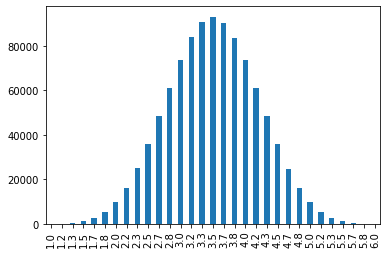

In [12]:
six_dice.total.value_counts().sort_index().plot(kind='bar')

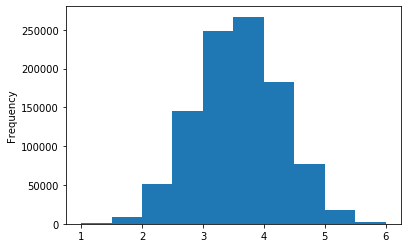

In [13]:
six_dice['total'].plot(kind='hist')

* H0: The average grades in web development are the same as the data science classes
* Ha: The average grades in web development are different as the data science classes

TN: H0 is true and we don't reject it. 
TP: Ha is true and we reject the H0
Type I: H0 is true but we reject the H0
Type II: H0 is false  but we didn't reject it. 

* H0: There is no relationship between how early a student shows up and their grade
* Ha: There is a relationship between how early a student shows up and their grade

* H0: Both Web dev and data science students are equally likely to be coffee drinkers
* Ha: One major is more likely to be coffee drinkers

### Load the mpg dataset and use it to answer the following questions:

In [14]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Text(0.5, 1.0, 'Feul efficiency in hwy for cars from 1999')

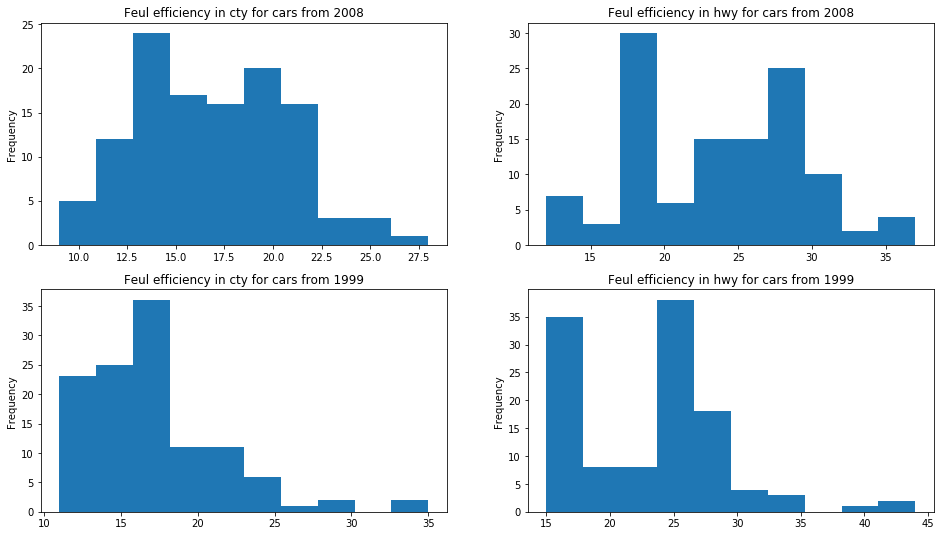

In [15]:
# Need cars from 2008 and 1999

boolean_2008 = (mpg.year == 2008)
boolean_2008

cars_2008 = mpg[boolean_2008]
cars_2008.head()

# It has two fuel-efficiency: cty and hwy

plt. figure(figsize=(16,9))

plt.subplot(2,2,1)
cars_2008.cty.plot(kind='hist')
plt.title('Feul efficiency in cty for cars from 2008')

plt.subplot(2,2,2)
cars_2008.hwy.plot(kind='hist')
plt.title('Feul efficiency in hwy for cars from 2008')

boolean_1999 = (mpg.year == 1999)
boolean_1999

cars_1999 = mpg[boolean_1999]
cars_1999.head()

plt.subplot(2,2,3)
cars_1999.cty.plot(kind='hist')
plt.title('Feul efficiency in cty for cars from 1999')

plt.subplot(2,2,4)
cars_1999.hwy.plot(kind='hist')
plt.title('Feul efficiency in hwy for cars from 1999')

B. Hypothesis:

H0: No difference in feul-efficiency in cty in cars from 2008 vs. 1999.
Ha: Difference exists in feul-efficiency in cty in cars from 2008 vs. 1999

C. Set Alpha
alpah = 0.05

In [19]:
# D. Verify Assumptions

cars_2008.cty.size
cars_2008.hwy.size
cars_1999.cty.size
cars_1999.cty.size

117

In [17]:
# E. compute test statistic and probability

t, p = stats.ttest_ind(cars_2008.cty, cars_1999.cty, equal_var=False)
t, p

(-0.5674988409997608, 0.5709289258613233)

In [ ]:
# Decide: 
# since p > alpha
# Accept the null hypothesis: there is no difference in feul-efficiency in city for cars from 2008 vs. 1999

In [18]:
t, p = stats.ttest_ind(cars_2008.hwy, cars_1999.hwy, equal_var=False)
t, p

(0.03286431672888292, 0.973811089269393)

In [ ]:
# Decide: 
# since p > alpha
# Accept the null hypothesis: there is no difference in feul-efficiency in hwy for cars from 2008 vs. 1999

### 2. Are compact cars more fuel-efficient than the average car?
**1. To compare the fuel-efficiency of compact cars against all the cars**<br>
**2. One sample t-test, one tail**<br>
**3. Continuous variable: cty and hwy mileages**<br>

In [20]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
157,pontiac,grand prix,3.8,1999,6,auto(l4),f,17,27,r,midsize
99,ford,mustang,5.4,2008,8,manual(m6),r,14,20,p,subcompact
110,hyundai,sonata,2.4,1999,4,manual(m5),f,18,27,r,midsize
139,mercury,mountaineer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv
62,dodge,durango 4wd,5.2,1999,8,auto(l4),4,11,16,r,suv


In [21]:
# Pull information for compact cars

boolean_compact = mpg['class'] == 'compact'
cars_compact = mpg[boolean_compact]
cars_compact.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
142,nissan,altima,2.4,1999,4,manual(m5),f,21,29,r,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
172,subaru,impreza awd,2.5,2008,4,manual(m5),4,19,25,p,compact
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact
198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact


### A. Plot Distribution

Text(0.5, 1.0, 'Feul efficiency in hwy for compact cars')

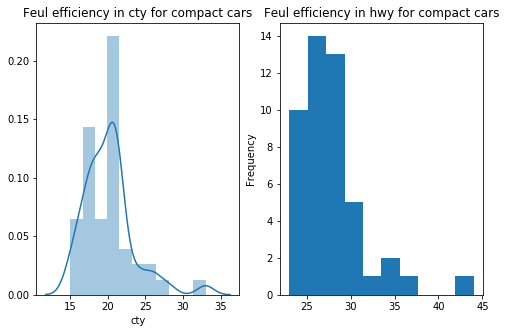

In [22]:
plt. figure(figsize=(8,5))

plt.subplot(1,2,1)

sns.distplot(cars_compact.cty)
plt.title('Feul efficiency in cty for compact cars')

plt.subplot(1,2,2)
cars_compact.hwy.plot(kind='hist')
plt.title('Feul efficiency in hwy for compact cars')

### B. Set Hypothesis

$H_01$: Compact cars are the same as the average regarding fuel efficiency in cities.<br>
$H_a1$: Compact cars are more fuel-efficient than the average in cities.<br>

$H_02$: Compact cars are the same as the average regarding fuel efficiency in highways.<br>
$H_a2$: Compact cars are more fuel-efficient than the average in highways.<br>

### C. Set alpha
alpha = 0.05

### D. Verifiy Assumpation

In [23]:
cars_compact.shape

(47, 11)

### E. Compute the statistic and probability

In [24]:
t, p = stats.ttest_1samp(cars_compact.cty, mpg.cty.mean())
t, p

(6.6191042534408915, 3.4017448216394005e-08)

In [25]:
t > 0 and p/2 < 0.05

True

**Reject the null hypothesis and accept the alternative**<br>
Compact cars are more fuel-efficient than the average in cities.

In [26]:
t, p = stats.ttest_1samp(cars_compact.hwy, mpg.hwy.mean())
t, p

(8.806470666529446, 1.9716962312411042e-11)

In [27]:
t > 0 and p/2 < 0.05

True

**Reject the null hypothesis and accept the alternative**<br>
Compact cars are more fuel-efficient than the average in highways.

### 3. Do manual cars get better gas mileage than automatic cars?

* To compare the means between manual and automatic cars
* Two Sample T-Test
* One tail test
* Categrical varibale: trans
* Continuous variable: gas mileage (cty and hwy)

In [28]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan
105,honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact
84,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
52,dodge,dakota pickup 4wd,3.9,1999,6,manual(m5),4,14,17,r,pickup


### A.Plot Distribution

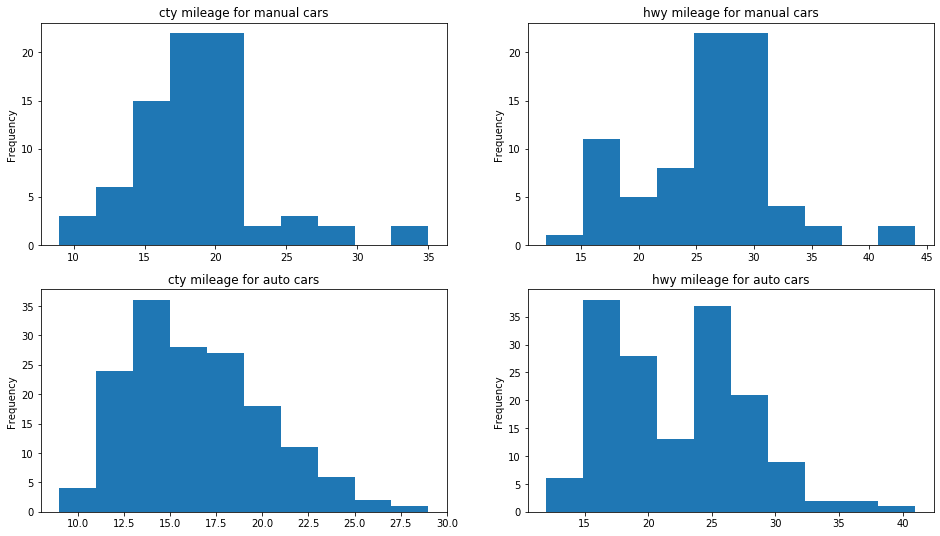

In [29]:
# The cars are grouped into manual and automatic

boolean_manual = mpg.trans.str.contains('manual')
manual_cars = mpg[boolean_manual]
manual_cars.sample(5)

boolean_auto = mpg.trans.str.contains('auto')
auto_cars = mpg[boolean_auto]
auto_cars.sample(5)

# Plot the cty and hwy mileage ditribution based on the type of the transmission

plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
plt.title('cty mileage for manual cars')
manual_cars.cty.plot(kind='hist')

plt.subplot(2,2,2)
plt.title('hwy mileage for manual cars')
manual_cars.hwy.plot(kind='hist')

plt.subplot(2,2,3)
plt.title('cty mileage for auto cars')
auto_cars.cty.plot(kind='hist')

plt.subplot(2,2,4)
plt.title('hwy mileage for auto cars')
auto_cars.hwy.plot(kind='hist')

### B. Set Hypothesis

$H_0$: Manual cars have the same gas mileage as the auto cars in cities.<br>
$H_a$: Manual cars have better gas mileage than the auto cars in cities.<br>

$H_0$: Manual cars have the same gas mileage as the auto cars in highways.<br>
$H_a$: Manual cars have better gas mileage than the auto cars in highways.<br>

### C. Set Alpha
alpha = 0.05

### D. Verify Assumption

In [30]:
auto_cars.shape

(157, 11)

In [31]:
manual_cars.shape

(77, 11)

### E. Compute test statistic and probability (t-statistic & p-value)

In [32]:
t_cty, p_cty = stats.ttest_ind(manual_cars.cty, auto_cars.cty, equal_var=False)
t_cty, p_cty

(4.537543658735826, 1.2633643745317661e-05)

In [33]:
t_hwy, p_hwy = stats.ttest_ind(manual_cars.hwy, auto_cars.hwy, equal_var=False)
t_hwy, p_hwy

(4.2815713224785, 3.3778249574249675e-05)

### F. Decide

In [34]:
t_cty > 0 and p_cty < 0.05

True

* Reject the null hpyothesis<br>
$H_a$: Manual cars have better gas mileage than the auto cars in cities.<br>

In [35]:
t_hwy > 0 and p_hwy < 0.05

True

* Reject the null hpyothesis<br>
$H_a$: Manual cars have better gas mileage than the auto cars in highways.<br>

## Correlation Exercises

### 1. Use the telco_churn data.

In [36]:
# Load Telco data ready for exploration

telco = pd.read_csv('/Users/mms3-pro/Downloads/Telco.csv')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         7043 non-null   object 
 1   gender              7043 non-null   object 
 2   is_senior_citizen   7043 non-null   object 
 3   partner             7043 non-null   object 
 4   dependents          7043 non-null   object 
 5   phone_service       7043 non-null   object 
 6   internet_service    7043 non-null   object 
 7   contract_type       7043 non-null   object 
 8   payment_type        7043 non-null   object 
 9   monthly_charges     7043 non-null   float64
 10  total_charges       7043 non-null   float64
 11  churn               7043 non-null   object 
 12  monthly_tenure      7043 non-null   float64
 13  service_type        7043 non-null   object 
 14  partner_dependents  7043 non-null   object 
dtypes: float64(3), object(12)
memory usage: 825.5+ KB


### a. Does tenure correlate with monthly charges? 

### A. Plot the two continuous variables

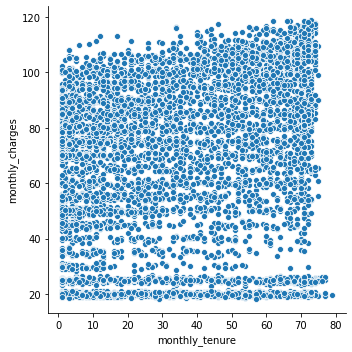

In [37]:
sns.relplot(data=telco, x='monthly_tenure', y='monthly_charges')

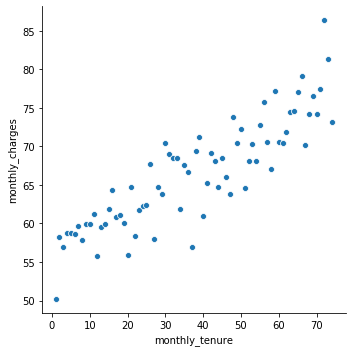

In [38]:
# Calculate the mean of the monthly charges for the monthly tenure

tenure_with_monthly_charges = telco.groupby('monthly_tenure')['monthly_charges'].mean()
tenure_with_monthly_charges = pd.DataFrame(tenure_with_monthly_charges)
tenure_with_monthly_charges.reset_index(inplace=True)

# Drop the abnormal data points

tenure_with_monthly_charges.drop([74,75,76,77], inplace=True)
tenure_with_monthly_charges.sample(5)

sns.relplot(data=tenure_with_monthly_charges, x='monthly_tenure', y='monthly_charges')

### B. Set Hypothesis

$H_0$: No linear relationship between tenure and monthly charges.<br>
$H_a$: Linear relationship exits between tenure and monthly charges.

### C. Set Alpha

alpha = 0.05

### D. Verify Assumption

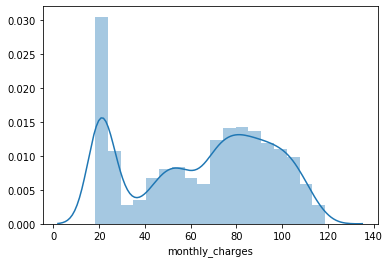

In [39]:
sns.distplot(telco.monthly_charges)

In [40]:
telco.monthly_charges.agg(['mean','median'])

mean      64.761692
median    70.350000
Name: monthly_charges, dtype: float64

### E. Calculate statistic and p-value

In [41]:
x = tenure_with_monthly_charges.monthly_tenure
y = tenure_with_monthly_charges.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

(0.8730287593051758, 3.749018368566803e-24)

### F. Decide

Reject the $H_0$ and accept the althernative: Linear relationship exits between tenure and monthly charges

In [42]:
p < 0.05

True

### Total charges? What happens if you control for phone and internet service?
### A. Scatter Plot the Two Variables

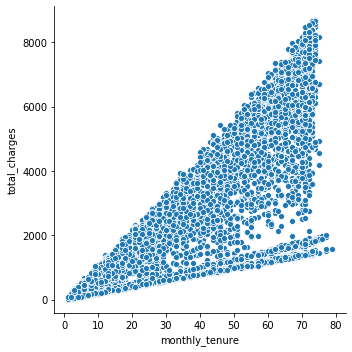

In [43]:
sns.relplot(data=telco, x='monthly_tenure', y='total_charges')

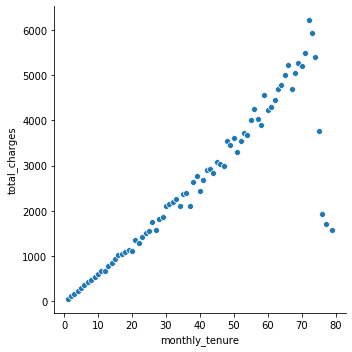

In [44]:
tenure_with_total_charges = telco.groupby('monthly_tenure')['total_charges'].mean()
tenure_with_total_charges = pd.DataFrame(tenure_with_total_charges)
tenure_with_total_charges.reset_index(inplace=True)
tenure_with_total_charges.sample(5)

sns.relplot(data=tenure_with_total_charges, x='monthly_tenure', y='total_charges')

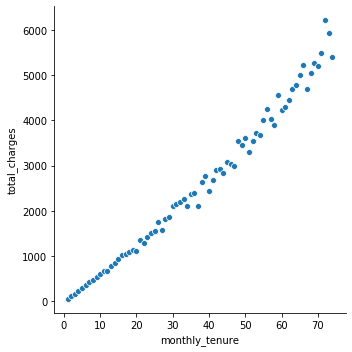

In [45]:
# Remove the abnormal datapoints

tenure_with_total_charges.drop([74,75,76,77], inplace=True)
sns.relplot(data=tenure_with_total_charges, x='monthly_tenure', y='total_charges')

### B. Set Hypothesis

$H_0$: No correlationship exits between tenure and total charges.<br>
$H_a$: Correlationship exits between tenure and total charges.

### C. Set Alpha

alpha = 0.05

### D. Verify Assumption

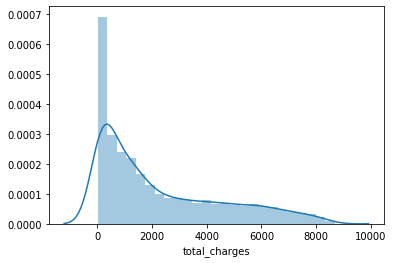

In [46]:
sns.distplot(telco.total_charges)

In [47]:
telco.total_charges.agg(['mean', 'median'])

mean      2279.798992
median    1394.550000
Name: total_charges, dtype: float64

### E. Calculate statistic and p-value

In [48]:
x = tenure_with_total_charges.monthly_tenure
y = tenure_with_total_charges.total_charges

r, p = stats.pearsonr(x, y)
r, p

(0.9916832349538083, 7.338095108929428e-66)

### F. Decide

* Reject null hypothesis and accept 'Correlationship exits between tenure and total charges.'

In [49]:
p < 0.05

True

### C. What happens if you control for phone and internet service?

In [50]:
telco.phone_service.unique()

array(['One Line', 'Two or More Lines', 'No Phone Service'], dtype=object)

### A. Plot monthly charges against tenure for each type of phone service. 

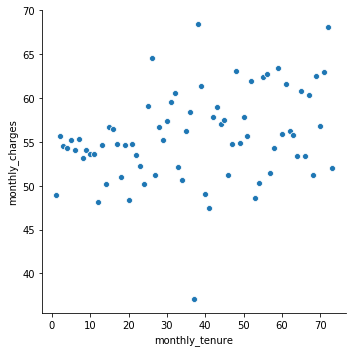

In [51]:
# One line phone service

boolean_one_line = telco.phone_service == 'One Line'
one_line = telco[boolean_one_line]
one_line.sample(5)

oneline_monthly = one_line.groupby('monthly_tenure').monthly_charges.mean()
oneline_monthly = pd.DataFrame(oneline_monthly)
oneline_monthly.reset_index(inplace=True)
oneline_monthly.drop([73,74,75,76], inplace=True)
oneline_monthly.tail()

sns.relplot(data=oneline_monthly, x='monthly_tenure', y='monthly_charges')

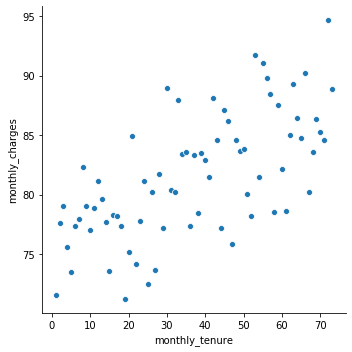

In [52]:
# Two or more lines

boolean_more_line = telco.phone_service == 'Two or More Lines'
more_line = telco[boolean_more_line]
more_line.sample(5)

more_line_monthly = more_line.groupby('monthly_tenure').monthly_charges.mean()
more_line_monthly = pd.DataFrame(more_line_monthly)
more_line_monthly.reset_index(inplace=True)
more_line_monthly.drop([73,74,75,76], inplace=True)
more_line_monthly.tail()

sns.relplot(data=more_line_monthly, x='monthly_tenure', y='monthly_charges')

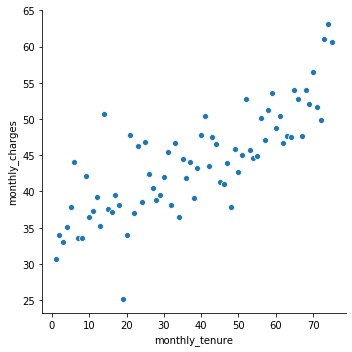

In [53]:
boolean_no_line = telco.phone_service == 'No Phone Service'
no_line = telco[boolean_no_line]
no_line.sample(5)

noline_monthly = no_line.groupby('monthly_tenure').monthly_charges.mean()
noline_monthly = pd.DataFrame(noline_monthly)
noline_monthly.reset_index(inplace=True)
noline_monthly.tail()

sns.relplot(data=noline_monthly, x='monthly_tenure', y='monthly_charges')

### D. Set Hypothesis

$H_0$: There is no correlation between tenure and monthly charges in one line/two line/no phone service. 
$H_a$: There is correlation between tenure and monthly charges in one line/two line/no phone service. 

### C. Set Alpha
alpha = 0.05

### D. Verify Assumption

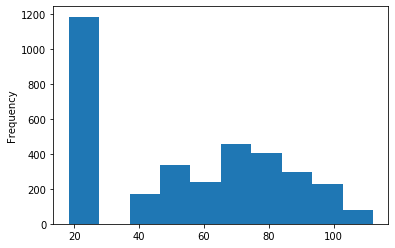

In [54]:
one_line.monthly_charges.plot.hist()

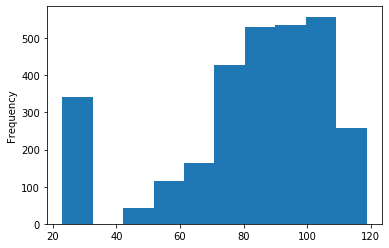

In [55]:
more_line.monthly_charges.plot.hist()

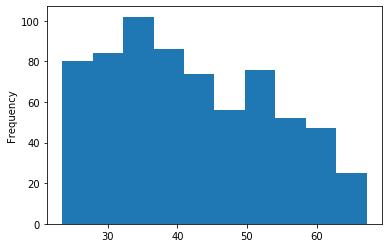

In [56]:
no_line.monthly_charges.plot.hist()

### E. Calculate statistics and p-value
### F. Decide

In [57]:
x = oneline_monthly.monthly_tenure
y = oneline_monthly.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.31424044873729295, 0.006779524031266351)

In [58]:
x = more_line_monthly.monthly_tenure
y = more_line_monthly.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.6566181677206118, 2.8341801682881433e-10)

In [59]:
x = noline_monthly.monthly_tenure
y = noline_monthly.monthly_charges

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.799996445721213, 7.375558381208825e-18)

### 2. Use the employees database.

In [20]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
query = 'select * from salaries;'

salaries_copy = pd.read_sql(query, url)
salaries_copy.sample(5)

,emp_no,salary,from_date,to_date
456145,58074,59294,1998-11-11,1999-11-11
1770550,286588,84898,2001-12-10,9999-01-01
552968,68210,95864,1993-04-28,1994-04-28
1507326,258806,56682,1994-11-01,1994-12-03
2394711,452483,41615,1995-07-25,1996-07-24


In [21]:
salaries_copy.from_date[0]

datetime.date(1986, 6, 26)

In [144]:
salaries = pd.read_csv('/Users/mms3-pro/Documents/employees_database/salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   salary     int64 
 2   from_date  object
 3   to_date    object
dtypes: int64(2), object(2)
memory usage: 86.8+ MB


### 2-1. Is there a relationship between how long an employee has been with the company and their salary?

In [145]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [146]:
# One employee may have more than one salaries, due to promotion or job changes

emp_10001 = salaries[salaries.emp_no==10001]
emp_10001

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
5,10001,71046,1991-06-25,1992-06-24
6,10001,74333,1992-06-24,1993-06-24
7,10001,75286,1993-06-24,1994-06-24
8,10001,75994,1994-06-24,1995-06-24
9,10001,76884,1995-06-24,1996-06-23


In [147]:
salaries['end_date'] = salaries.to_date.apply(lambda i:
                                              date.today() if i == '9999-01-01' 
                                              else datetime.strptime(i, '%Y-%m-%d').date()
                                             )

salaries['start_date'] = salaries.from_date.apply(lambda i: 
                                                  datetime.strptime(i, '%Y-%m-%d').date()
                                                 )

salaries.sample(10)

,emp_no,salary,from_date,to_date,end_date,start_date
1173182,223459,62892,1991-09-23,1992-09-22,1992-09-22,1991-09-23
2546004,468418,72364,2000-11-10,2001-11-10,2001-11-10,2000-11-10
227180,33913,56640,1990-11-06,1991-11-06,1991-11-06,1990-11-06
2800430,495363,43247,1994-09-29,1995-09-29,1995-09-29,1994-09-29
69772,17344,84772,1996-08-02,1997-08-02,1997-08-02,1996-08-02
104517,21012,78111,1995-03-08,1996-03-07,1996-03-07,1995-03-08
499259,62563,51309,1994-04-16,1995-04-16,1995-04-16,1994-04-16
2493974,462941,81338,1987-02-10,1988-02-10,1988-02-10,1987-02-10
1624444,271163,68460,1996-10-23,1997-10-23,1997-10-23,1996-10-23
331823,45013,51737,1989-03-05,1990-03-05,1990-03-05,1989-03-05


In [148]:
salaries['time_span'] = ((salaries.end_date - salaries.start_date).dt.days/365).round()
salaries['tenure'] = salaries.groupby('emp_no').time_span.cumsum()
salaries.head(10)

,emp_no,salary,from_date,to_date,end_date,start_date,time_span,tenure
0,10001,60117,1986-06-26,1987-06-26,1987-06-26,1986-06-26,1.0,1.0
1,10001,62102,1987-06-26,1988-06-25,1988-06-25,1987-06-26,1.0,2.0
2,10001,66074,1988-06-25,1989-06-25,1989-06-25,1988-06-25,1.0,3.0
3,10001,66596,1989-06-25,1990-06-25,1990-06-25,1989-06-25,1.0,4.0
4,10001,66961,1990-06-25,1991-06-25,1991-06-25,1990-06-25,1.0,5.0
5,10001,71046,1991-06-25,1992-06-24,1992-06-24,1991-06-25,1.0,6.0
6,10001,74333,1992-06-24,1993-06-24,1993-06-24,1992-06-24,1.0,7.0
7,10001,75286,1993-06-24,1994-06-24,1994-06-24,1993-06-24,1.0,8.0
8,10001,75994,1994-06-24,1995-06-24,1995-06-24,1994-06-24,1.0,9.0
9,10001,76884,1995-06-24,1996-06-23,1996-06-23,1995-06-24,1.0,10.0


In [151]:
salaries_wrangled = salaries
salaries_wrangled.head(15)

,emp_no,salary,from_date,to_date,end_date,start_date,time_span,tenure
0,10001,60117,1986-06-26,1987-06-26,1987-06-26,1986-06-26,1.0,1.0
1,10001,62102,1987-06-26,1988-06-25,1988-06-25,1987-06-26,1.0,2.0
2,10001,66074,1988-06-25,1989-06-25,1989-06-25,1988-06-25,1.0,3.0
3,10001,66596,1989-06-25,1990-06-25,1990-06-25,1989-06-25,1.0,4.0
4,10001,66961,1990-06-25,1991-06-25,1991-06-25,1990-06-25,1.0,5.0
5,10001,71046,1991-06-25,1992-06-24,1992-06-24,1991-06-25,1.0,6.0
6,10001,74333,1992-06-24,1993-06-24,1993-06-24,1992-06-24,1.0,7.0
7,10001,75286,1993-06-24,1994-06-24,1994-06-24,1993-06-24,1.0,8.0
8,10001,75994,1994-06-24,1995-06-24,1995-06-24,1994-06-24,1.0,9.0
9,10001,76884,1995-06-24,1996-06-23,1996-06-23,1995-06-24,1.0,10.0


In [152]:
salaries_wrangled = salaries_wrangled[salaries_wrangled.to_date == '9999-01-01']
salaries_wrangled

,emp_no,salary,from_date,to_date,end_date,start_date,time_span,tenure
16,10001,88958,2002-06-22,9999-01-01,2020-09-05,2002-06-22,18.0,34.0
22,10002,72527,2001-08-02,9999-01-01,2020-09-05,2001-08-02,19.0,24.0
29,10003,43311,2001-12-01,9999-01-01,2020-09-05,2001-12-01,19.0,25.0
45,10004,74057,2001-11-27,9999-01-01,2020-09-05,2001-11-27,19.0,34.0
58,10005,94692,2001-09-09,9999-01-01,2020-09-05,2001-09-09,19.0,31.0
...,...,...,...,...,...,...,...,...
2844010,499995,52868,2002-06-01,9999-01-01,2020-09-05,2002-06-01,18.0,23.0
2844017,499996,69501,2002-05-12,9999-01-01,2020-09-05,2002-05-12,18.0,24.0
2844032,499997,83441,2001-08-26,9999-01-01,2020-09-05,2001-08-26,19.0,33.0
2844041,499998,55003,2001-12-25,9999-01-01,2020-09-05,2001-12-25,19.0,27.0


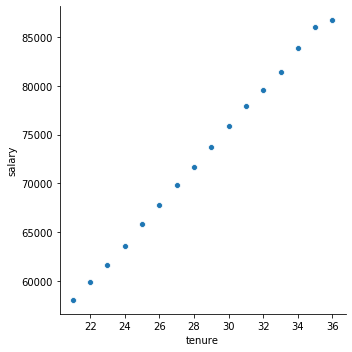

In [153]:
salary_over_tenure = salaries_wrangled.groupby('tenure').salary.mean()
salary_over_tenure = pd.DataFrame(salary_over_tenure)
salary_over_tenure.reset_index(inplace=True)

salary_over_tenure
sns.relplot(data=salary_over_tenure, x='tenure', y='salary')

In [154]:
salary_over_tenure

,tenure,salary
0,21.0,58050.113029
1,22.0,59856.832573
2,23.0,61608.593965
3,24.0,63604.260250
4,25.0,65794.759262
5,26.0,67764.047763
6,27.0,69791.801695
7,28.0,71664.190721
8,29.0,73742.970225
9,30.0,75926.607633


In [155]:
x = salary_over_tenure.tenure
y = salary_over_tenure.salary

r, p = stats.pearsonr(x, y)
r, p

# Reject the null hypothesis

(0.999513185387565, 1.7351120077314795e-22)

### b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

* Two quantitative variables: tenure and number of titles

In [34]:
# from env import host, user, password

# url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
# query = 'select * from titles;'

# titles = pd.read_sql(query, url)

# titles.to_csv('/Users/mms3-pro/Documents/employees_database/titles.csv', date_format = '%Y%m%d')

In [28]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


In [13]:
# Calculate the number of titles for each employee

# Any NA in titles? No, column 'title' doesn't contain any null value. 

titles.title.isnull().any()

# Group by emp_no, then count the number of observations in the title column

title_counts = titles.groupby('emp_no').title.count()

# Convert the Series to DadaFrame

title_counts = pd.DataFrame(title_counts)

title_counts.head()

,title
emp_no,
10001,1
10002,1
10003,1
10004,2
10005,2


In [47]:
titles.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [49]:
# Check the date type of columns from_date and to_date

titles.to_date[0]

datetime.date(9999, 1, 1)

In [61]:
# Calculate the tenure for each employee

current = datetime.date(9999, 1, 1)
current

# Convert date 9999-1-1 to today's date

titles['to_date'] = titles.to_date.apply(lambda i: date.today() if i == current else i)

In [65]:
titles['time_span'] = ((titles.to_date - titles.from_date).dt.days/365).round()

In [69]:
titles['time_span_cumsum'] = titles.groupby('emp_no').time_span.cumsum()

In [82]:
titles.head()

,emp_no,title,from_date,to_date,time_span,time_span_cumsum
0,10001,Senior Engineer,1986-06-26,2020-09-06,34.0,34.0
1,10002,Staff,1996-08-03,2020-09-06,24.0,24.0
2,10003,Senior Engineer,1995-12-03,2020-09-06,25.0,25.0
3,10004,Engineer,1986-12-01,1995-12-01,9.0,9.0
4,10004,Senior Engineer,1995-12-01,2020-09-06,25.0,34.0


In [73]:
employee_tenure = titles.groupby('emp_no').time_span_cumsum.max()
employee_tenure = pd.DataFrame(employee_tenure)
employee_tenure.head()

,time_span_cumsum
emp_no,
10001,34.0
10002,24.0
10003,25.0
10004,34.0
10005,31.0


In [78]:
# Merge title_counts and employee_tenure

titles_over_tenure = title_counts.merge(employee_tenure, how='inner', left_index=True, right_index=True)
titles_over_tenure.head()

,title,time_span_cumsum
emp_no,,
10001,1,34.0
10002,1,24.0
10003,1,25.0
10004,2,34.0
10005,2,31.0


In [87]:
titles_vs_tenure = titles_over_tenure.groupby('time_span_cumsum').title.mean()

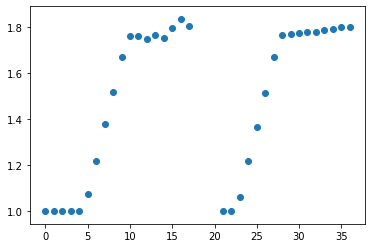

In [88]:
x= titles_vs_tenure.index
y=titles_vs_tenure.values

plt.scatter(x,y)

In [89]:
r, p = stats.pearsonr(x,y)
r, p

(0.5444694747807576, 0.0008715490566663523)

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

* Two numerical variables: days and reaction time

In [2]:
# Load the seelpstudy data

sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [3]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


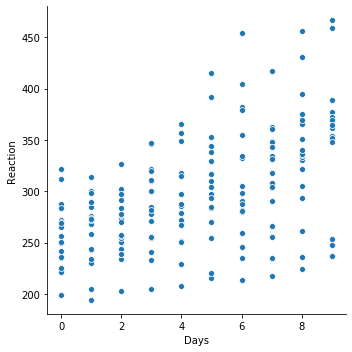

In [7]:
# A. Scatter plot the data

sns.relplot(x='Days', y='Reaction', data=sleepstudy)

In [23]:
# Each day has multiple entries for reaction time beacuse there are multiple subjects. 
# The mean of reaction time is calculated. 

sleepstudy_Days = sleepstudy.groupby('Days').Reaction.agg(['mean','std','median']).round(1)
sleepstudy_Days

,mean,std,median
Days,,,
0,256.7,32.1,253.4
1,264.5,33.4,273.0
2,265.4,29.5,263.6
3,283.0,38.9,281.2
4,288.6,42.5,282.5
5,308.5,51.8,307.3
6,312.2,63.2,294.1
7,318.8,50.1,333.2
8,336.6,60.2,336.0


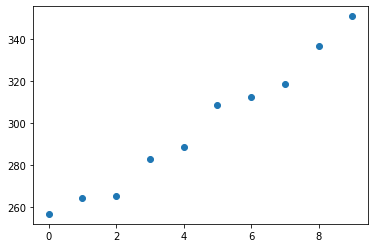

In [28]:
# Plot the mean of reactio time over days

x=sleepstudy_Days.index
y=sleepstudy_Days['mean']

plt.scatter(x,y)

### B. Set Hypothesis
$H_0$: No linear relationship exits between days and reaction time.<br>
$H_a$: Linear relationship exits between days and reaction time.

### C. Set Alpha
$\alpha$ = 0.05

### D. Verify Assumption

### E. Calculate the statistics

In [13]:
x = sleepstudy.Days
y = sleepstudy.Reaction

r, p = stats.pearsonr(x,y)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [22]:
x = sleepstudy_Days.index
y = sleepstudy_Days['mean']

r, p = stats.pearsonr(x,y)
r, p

(0.9893145867553406, 5.63071666342679e-08)

### F. Decide

since p < 0.05, the null hypothesis is rejected. 

## Chi Square Exercise

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [29]:
# Create the contingency table

table = pd.DataFrame([[49,20],[1,30]], 
                     index=['Uses a Macbook', "Doesn't Use a Macbook"],
                     columns=['Codeup Student', 'Not Codeup Student']
                    )
table

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use a Macbook,1,30


### Set Hypothesis
$H_0$: Using a Macbook and being a codeup student are independent of each other.<br>
$H_a$: Using a Macbook and being a codeup student are NOT independent.

### Set Alpha
$\alpha$ = 0.05

### Verify Assumption

In [30]:
chi2, p, degf, expected = stats.chi2_contingency(table)
p

1.4116760526193828e-09

### Since p < 0.05, Reject the null hypothesis.

### 2. Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [31]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
mpg_doc = data('mpg', show_doc=True)
mpg_doc

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [37]:
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

### Categorical Variables:
1. year: [1999, 2008]
2. cyl: [4, 6, 8, 5]
3. trans: ['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)','auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)']
4. class: ['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup','subcompact']

### Set Hypothesis
$H_0$: The year of make and type of transmission are independent of each other.<br>
$H_a$: The year of make is correlated with the type of transmission. 

### Set Alpha
$\alpha$ = 0.05

In [49]:
# Regroup the type of transmission into ['auto', 'manual']

mpg.trans = mpg.trans.apply(lambda i: 'auto' if 'auto' in i else 'manual')

In [50]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [59]:
observed = pd.crosstab(mpg.year, mpg.trans)
observed

trans,auto,manual
year,,
1999,74,43
2008,83,34


In [60]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.2657001056392438

### since p > 0.05, we accept the null hypothesis: The year of make and type of transmission are independent of each other.

### 3. Use the data from the employees database to answer these questions

In [61]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
query = """select gender, title, dept_name
from dept_emp as de
join departments using(dept_no)
join employees using(emp_no)
join titles using(emp_no)
where de.to_date > curdate()
and titles.to_date > curdate();"""

data = pd.read_sql(query, url)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gender     240124 non-null  object
 1   title      240124 non-null  object
 2   dept_name  240124 non-null  object
dtypes: object(3)
memory usage: 5.5+ MB


### 1. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [63]:
data.dept_name.unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [64]:
boolean = (data.dept_name == 'Sales') | (data.dept_name == 'Marketing')
data_gender_sales_marketing = data[boolean]
data_gender_sales_marketing.sample(10)

,gender,title,dept_name
204526,M,Senior Staff,Sales
215178,M,Senior Staff,Sales
114494,M,Senior Staff,Marketing
239960,M,Senior Staff,Sales
216666,M,Senior Staff,Sales
215399,F,Senior Staff,Sales
225960,M,Senior Staff,Sales
207281,M,Senior Staff,Sales
117601,M,Senior Staff,Marketing
104753,F,Staff,Marketing


In [69]:
data_gender_sales_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52543 entries, 104290 to 240123
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     52543 non-null  object
 1   title      52543 non-null  object
 2   dept_name  52543 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [67]:
observed = pd.crosstab(data_gender_sales_marketing.gender, data_gender_sales_marketing.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


### Hypothesis
$H_0$: An employee's gender is independent of whether an employee works in sales or marketing.<br>
$H_a$: An employee's gender is correlated with whether an employee works in sales or marketing

### $\alpha$ = 0.05

### Verify Assumption

In [68]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

### Since p > 0.05, the null hypothesis is accepted. 

### 2. Is an employee's gender independent of whether or not they are or have been a manager?

In [73]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'
    
query = """select gender, title 
from employees
join titles using(emp_no)"""

data = pd.read_sql(query, url)

In [77]:
data.head()

,gender,title
0,M,Senior Engineer
1,F,Staff
2,M,Senior Engineer
3,M,Engineer
4,M,Senior Engineer


In [75]:
data.title.unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [78]:
data.title = data.title.apply(lambda i: 
                              'are or have been a manager' if i == 'Manager' 
                              else 'Never be a manager'
                             )

In [79]:
data.head()

,gender,title
0,M,Never be a manager
1,F,Never be a manager
2,M,Never be a manager
3,M,Never be a manager
4,M,Never be a manager


In [81]:
observed = pd.crosstab(data.gender, data.title)
observed

title,Never be a manager,are or have been a manager
gender,,
F,177211,13
M,266073,11


### Hypothesis:
$H_0$: Employee's gender is independent of whether or not they are or have been a manager.<br>
$H_a$: Employee's gender has correlation with whether or not they are or have been a manager.

### $\alpha$ = 0.05

### Verify Assumption

In [82]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.22600394509880642

### Since p > 0.05, the null hypothesis is accepted. 

## Statistical Testing Examples in Python

**chi2**: to compare two categorical variables<br>
**pearson r**: to compare two coninuous variables<br>
**t-test**: to compare one categorical and one continuous variable

In [3]:
tips =  data('tips')
tips.shape

(244, 7)

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

### 1. $H_0$: sex is indep of whether or not someone is a smoker.
### $\alpha$ = 0.05

In [7]:
observed = pd.crosstab(tips.sex, tips.smoker)
observed

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [10]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p, expected

(0.925417020494423,
 array([[53.84016393, 33.15983607],
        [97.15983607, 59.84016393]]))

### Decide: since p > 0.05, the null hypothesis is accepted.

### 2. $H_0$: There is not linear correlation between the total bill and the tip amount
### $\alpha$ = 0.05

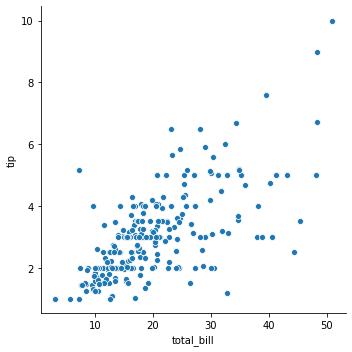

In [11]:
sns.relplot(x='total_bill', y='tip', data=tips)

In [12]:
x = tips.total_bill
y = tips.tip

t, p = stats.pearsonr(x,y)
t, p

(0.6757341092113645, 6.692470646863477e-34)

### Decide: since p < 0.05, the null hypothesis is rejected. 

### 3. $H_0$: The average bill for smokers is no different than the population mean. 
### $\alpha$ = 0.05

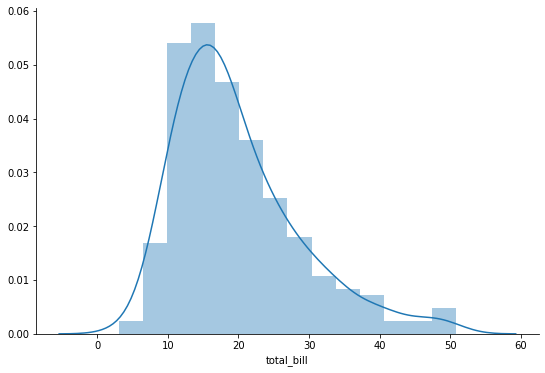

In [19]:
sns.distplot(a=tips.total_bill)

In [21]:
boolean = (tips.smoker == 'Yes')
smoker = tips[boolean]
smoker.head()

,total_bill,tip,sex,smoker,day,time,size
57,38.01,3.00,Male,Yes,Sat,Dinner,4
59,11.24,1.76,Male,Yes,Sat,Dinner,2
61,20.29,3.21,Male,Yes,Sat,Dinner,2
62,13.81,2.00,Male,Yes,Sat,Dinner,2
63,11.02,1.98,Male,Yes,Sat,Dinner,2


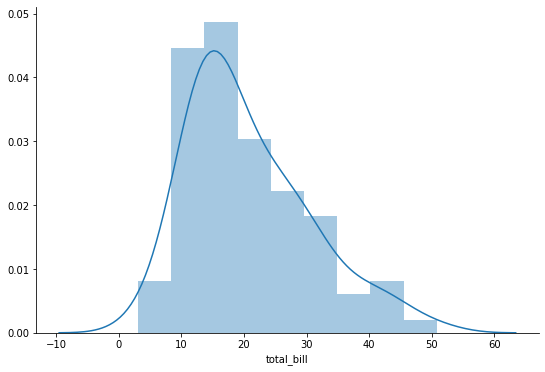

In [22]:
sns.distplot(smoker.total_bill)

In [25]:
smoker_total_bill = smoker.total_bill
smoker_total_bill

overall_total_bill_mean = tips.total_bill.mean()
overall_total_bill_mean

t,p = stats.ttest_1samp(smoker_total_bill, overall_total_bill_mean)
t,p

(0.951796790928544, 0.3436939512284921)

### Decide: since p > 0.05, the null hypothesis is accepted. 

### 4. $H_0$: The average size of the tip left by parties of 2 and parties of 4 is the same. 
### $\alpha$ = 0.05

In [31]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [33]:
parties_of_2 = tips[tips['size'] == 2]
parties_of_4 = tips[tips['size'] == 4]

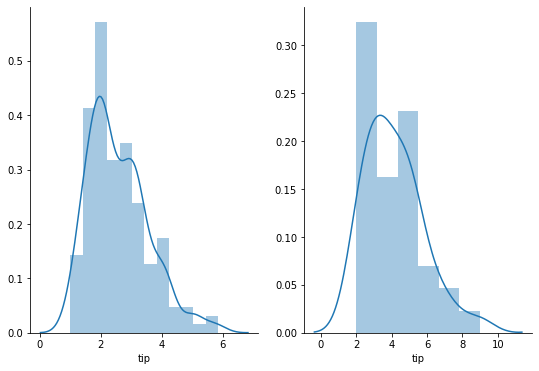

In [36]:
plt.subplot(1,2,1)
sns.distplot(parties_of_2.tip)

plt.subplot(1,2,2)
sns.distplot(parties_of_4.tip)

In [42]:
print(parties_of_2.tip.std(), parties_of_4.tip.std())

0.9855012454150628 1.6406682151465581


In [40]:
t, p = stats.ttest_ind(parties_of_2.tip, parties_of_4.tip, equal_var=False)
t, p

(-5.526483033981169, 1.8553894150648987e-06)

### Decide: Since p < 0.05, the null hypothesis is rejected. 